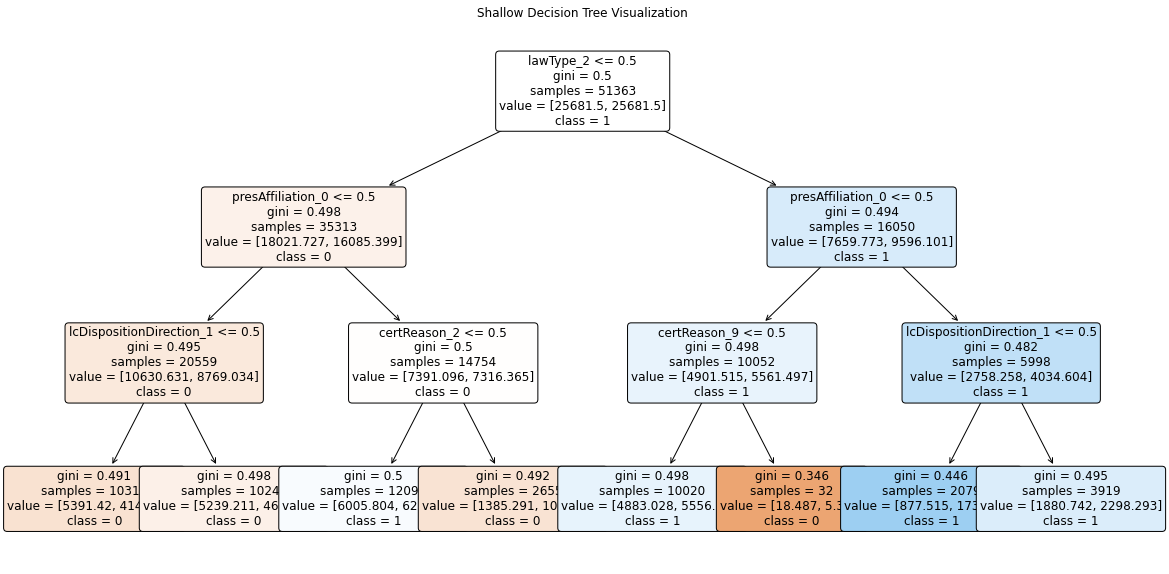

Accuracy (Shallow Decision Tree): 0.49918230667393504
Confusion Matrix (Shallow Decision Tree):
 [[4926 5502]
 [ 929 1484]]
Classification Report (Shallow Decision Tree):
               precision    recall  f1-score   support

           0       0.84      0.47      0.61     10428
           1       0.21      0.62      0.32      2413

    accuracy                           0.50     12841
   macro avg       0.53      0.54      0.46     12841
weighted avg       0.72      0.50      0.55     12841



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('NASCOTUS_fixed.csv')


# train test split

X = data.drop('justicesDecision', axis=1)
y = data['justicesDecision']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define column transformer for one-hot encoding
categorical_features = X.columns.tolist()
column_transformer = ColumnTransformer([
    ("cat", OneHotEncoder(), categorical_features)
], remainder='passthrough')

# define the pipeline with the shallow decision tree classifier
pipeline_shallow = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', DecisionTreeClassifier(class_weight = 'balanced', max_depth=3, random_state=42))
])

# train!
pipeline_shallow.fit(X_train, y_train)

# predict!
y_pred_shallow = pipeline_shallow.predict(X_test)

# evaluate model
accuracy_shallow = accuracy_score(y_test, y_pred_shallow)
confusion_matrix_shallow = confusion_matrix(y_test, y_pred_shallow)
classification_report_shallow = classification_report(y_test, y_pred_shallow)

# convert class names to string format
class_names_str_shallow = [str(cls) for cls in pipeline_shallow.named_steps['classifier'].classes_]

# Plot the decision tree with improved readability
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(pipeline_shallow.named_steps['classifier'], 
          filled=True, 
          feature_names=pipeline_shallow.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(),
          class_names=class_names_str_shallow, 
          rounded=True, 
          fontsize=12)  # Increase fontsize for better readability
plt.title("Shallow Decision Tree Visualization")  # Add a descriptive title
plt.show()

# print evaluation metrics
print("Accuracy (Shallow Decision Tree):", accuracy_shallow)
print("Confusion Matrix (Shallow Decision Tree):\n", confusion_matrix_shallow)
print("Classification Report (Shallow Decision Tree):\n", classification_report_shallow)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('NASCOTUS_fixed.csv')

There are 3 unique values in the column.
34568
